<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Graphs4Sci/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"><h1>Visualization for Science</h1>
<h1>Nightingale Plot</h1>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.patches import Wedge, Patch
from matplotlib.collections import PatchCollection
import matplotlib.font_manager as font_manager

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 9fa3dbd9d128a84e679d23456a0b79a628fff382

numpy     : 1.19.2
json      : 2.0.9
watermark : 2.1.0
matplotlib: 3.3.2
pandas    : 1.1.3



# Load the dataset

In [3]:
data = pd.read_excel('https://github.com/DataForScience/Viz4Sci/raw/master/data/Nightingale.xlsx')

In [4]:
data.head()

,Month,Year,Cause of Death,Monthly Death Total,Annual Mortality Rate (per 1000 soldiers)
0,April,1854,Infectious Disease,1,1.4
1,May,1854,Infectious Disease,12,6.2
2,June,1854,Infectious Disease,11,4.7
3,July,1854,Infectious Disease,359,150.0
4,August,1854,Infectious Disease,828,328.5


Combine month and year into a single column

In [5]:
data['date'] = data[['Month', 'Year']].apply(lambda x:x['Month'] + ' ' + str(x['Year']), axis=1)

Pivot data into a table with each cause of death as a column. We're keeping only the mortality rate.

In [6]:
infectious = pd.pivot_table(data, index='date', columns='Cause of Death', 
                            values='Annual Mortality Rate (per 1000 soldiers)', aggfunc='sum')

In [7]:
infectious

Cause of Death,All Other Causes,Infectious Disease,Wounds and Injuries
date,,,
April 1854,7.0,1.4,0.0
April 1855,21.2,177.5,17.9
August 1854,11.9,328.5,0.4
August 1855,6.7,129.9,44.1
December 1854,48.0,631.5,41.7
December 1855,7.8,25.3,5.0
February 1855,140.1,822.8,16.3
February 1856,5.2,6.6,0.0
January 1855,120.0,1022.8,30.7


Put the columns in the right order

In [8]:
infectious = infectious[['Wounds and Injuries', 'All Other Causes', 'Infectious Disease', ]]

Normalize values

In [9]:
infectious = (infectious**2).cumsum(axis=1)
infectious /= infectious.max().max()
infectious = np.sqrt(infectious)

Subset and order the rows

In [10]:
order = [
 'April 1854',   'May 1854',        'June 1854', 
 'July 1854',    'August 1854',     'September 1854', 
 'October 1854', 'November 1854', 'December 1854',
 'January 1855', 'February 1855', 'March 1855',]

infectious = infectious.loc[order].reset_index()
infectious = infectious[::-1]

Color list

In [11]:
colors =['#51a7f9',  'black', '#f9517b', ]

Generate the figure

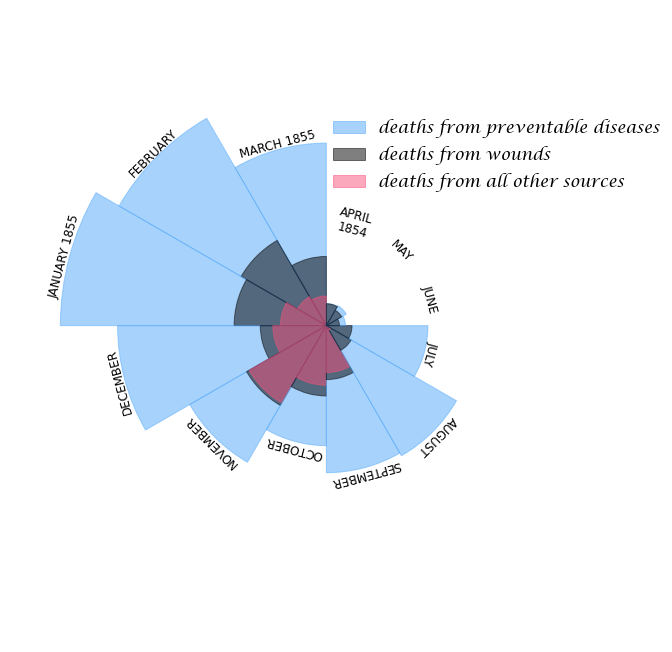

In [12]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.set_aspect(1.)

patches = []
color = []
total = 90 # First wedge starts off at 90'
angle = 30 # Each wedge covers 30'

for i in range(infectious.shape[0])[::1]:
    for j, col in enumerate(['Infectious Disease', 
                             'All Other Causes', 
                             'Wounds and Injuries', ]):
        value = infectious[col].iloc[i]
        patches.append(Wedge((0, 0), np.sqrt(value), 
                                     total,
                                     total+angle
                                     ))
        color.append(colors[j])
    
    length = np.max([np.sqrt(infectious.iloc[i, 1:4].max())+0.02, 0.4])
    x = length * np.cos((total+angle/2)*np.pi/180)
    y = length * np.sin((total+angle/2)*np.pi/180)
    
    label = infectious['date'].iloc[i]
        
    if label[:3] not in ['Mar', 'Jan', 'Apr']:
        label = label.split()[0]
    elif label[:3] == 'Apr':
        label = '\n'.join(label.split())
    
    ax.text(x, y, label.upper(), rotation=(total+angle/2-90), 
            ha='center', va='center', fontsize=12)
    
    total += angle

p = PatchCollection(patches, color=color, alpha=0.5)
ax.add_collection(p)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

patches = []
legend = ['deaths from preventable diseases', 
          'deaths from wounds', 
          'deaths from all other sources']

# you'll need to change the font location
font = font_manager.FontProperties(fname='/Users/bgoncalves/Library/Fonts/Lucida Calligraphy Italic.ttf',
                               weight='normal',
                               style='italic', size=16)

for i, leg in enumerate(legend):
    patches.append(Patch(color=colors[i], label=leg, alpha=0.5))

ax.legend(handles=patches, loc=(0.5, 0.7), 
          fancybox=False, frameon=False, prop=font)

ax.axis('off')
fig.tight_layout()

Which compares nicely with the original

<img src='https://pbs.twimg.com/media/BqzygKNCUAEHaNf?format=png&name=small'>

<div style="width: 100%; overflow: hidden;">
     <img src="https://raw.githubusercontent.com/DataForScience/Graphs4Sci/master/data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>